### Cooperating Processes

- An **independent process** is not affected by other running processes.
- **Cooperating processes** may affect each other, hopefully in some controlled way.

Why Cooperating processes?
- Information sharing
- Computational speedup
- Modularity or convenience

For the processes to cooperate, they must have a way to communicate with each other. Two common methods:

- Shared variables: some segment of memory accessible to both processes
- Message passing: a process sends an explicit message that is received by another.



#### Producer-Consumer Problem

One or more produces processes is "producing" data. This data is stored in a buffer to be "consumed" by one or more consumer processes.
Here are the variables needed to defined the problem.


In [ ]:
# define BUFFER_SIZE 10
typedef struct {
    DATA data;
}

item;

item buffer[BUFFER_SIZE];
int in = 0;        // Location of next input to buffer
int out = 0;       // Location of next removal from buffer 
int counter = 0;   // Number of buffers currently full

**A Producer** process "produces" information "consumed" by a **Consumer** process.

In [ ]:
item nextProduced;

while(TRUE){
    while(counter == BUFFER_SIZE);
    buffer[in] = nextProduced;
    in = (in + 1) % BUFFER_SIZE;
    
    counter ++;
}


item nextConsumed;
while(TRUE){
    while(counter == 0);
    nextConsumed = buffer[out];
    out = (out + 1) % BUFFER_SIZE;
    
    counter--;
}


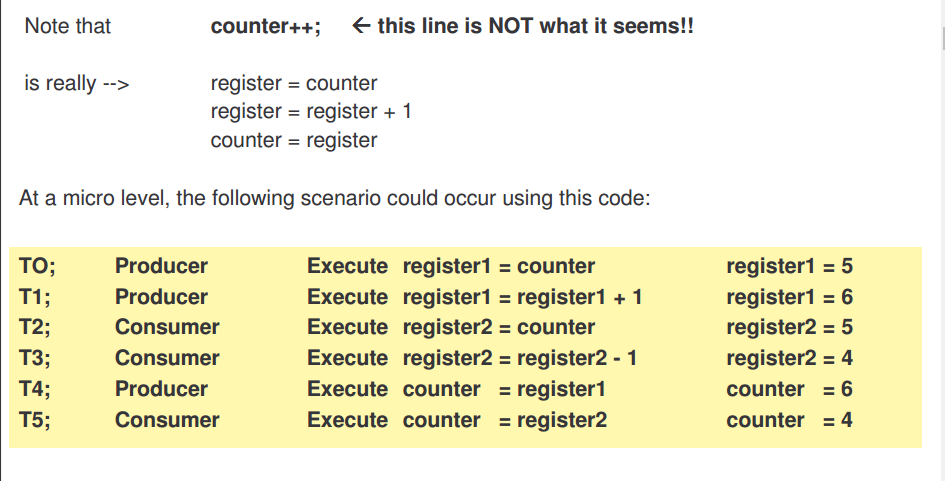

In [1]:
from IPython.display import Image
Image("assets/processsync.png")

**A Race Condition **
is a situation where several processes access and manipulate the same data concurrently and the outcome of the execution depends on the particular order in which the access takes place.

In order to guard against the race condition above, we need to ensure that only one process at a time can manipulate data. To make such a guarantee, we require that ** the processes be synchronized in some way **.

### The Critical-Section Problem

** A section of code, common to n cooperating processes, in which the processes may be accessing common variables. **

A critival section Environment contains:
- **Entry Section** : Code requesting entry into the critical section 
- **Critical Section** : Code in which only one process can execute at any one time
- ** Exit Section ** : The end of the critical section, releasing or allowing others in.
- ** Remainder Section** : Rest of the code AFTER the critical section.

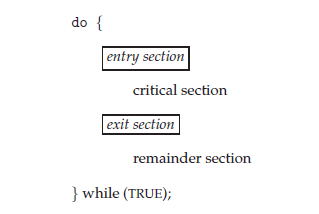

In [2]:
from IPython.display import Image
Image("assets/critical.png")

** The critical section must ENFORCE ALL THREE of the following rules: **
- **Mutual Exclusion** : No more than one process can execute in its critical section at one time.
- **Progress** : If no one is in the critical section and someone wants in, then those processes not in their remainder section must be able to decide in a finite time who should go in.
- **Bounded Wait** : All requesters must eventually be let into the critical section.


** Two general approaches are used to handle critical sections in operating systems **
- **Preemptive kernels** : Allow a process to be preempted while it is running in kernel mode.
- **Nonpreemptive kernels**: Don't allow a process running in kernel mode to be preempted; a kernel-mode process will run until it exists kernel mode, blocks, or voluntarily yields control of the CPU

### Peterson's Solution



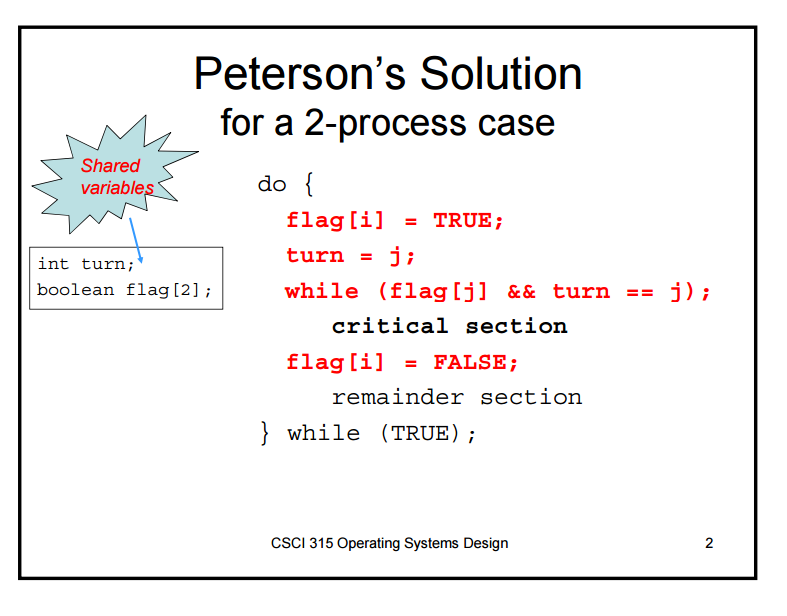

In [1]:
from IPython.display import Image
Image("assets/peterson.png")

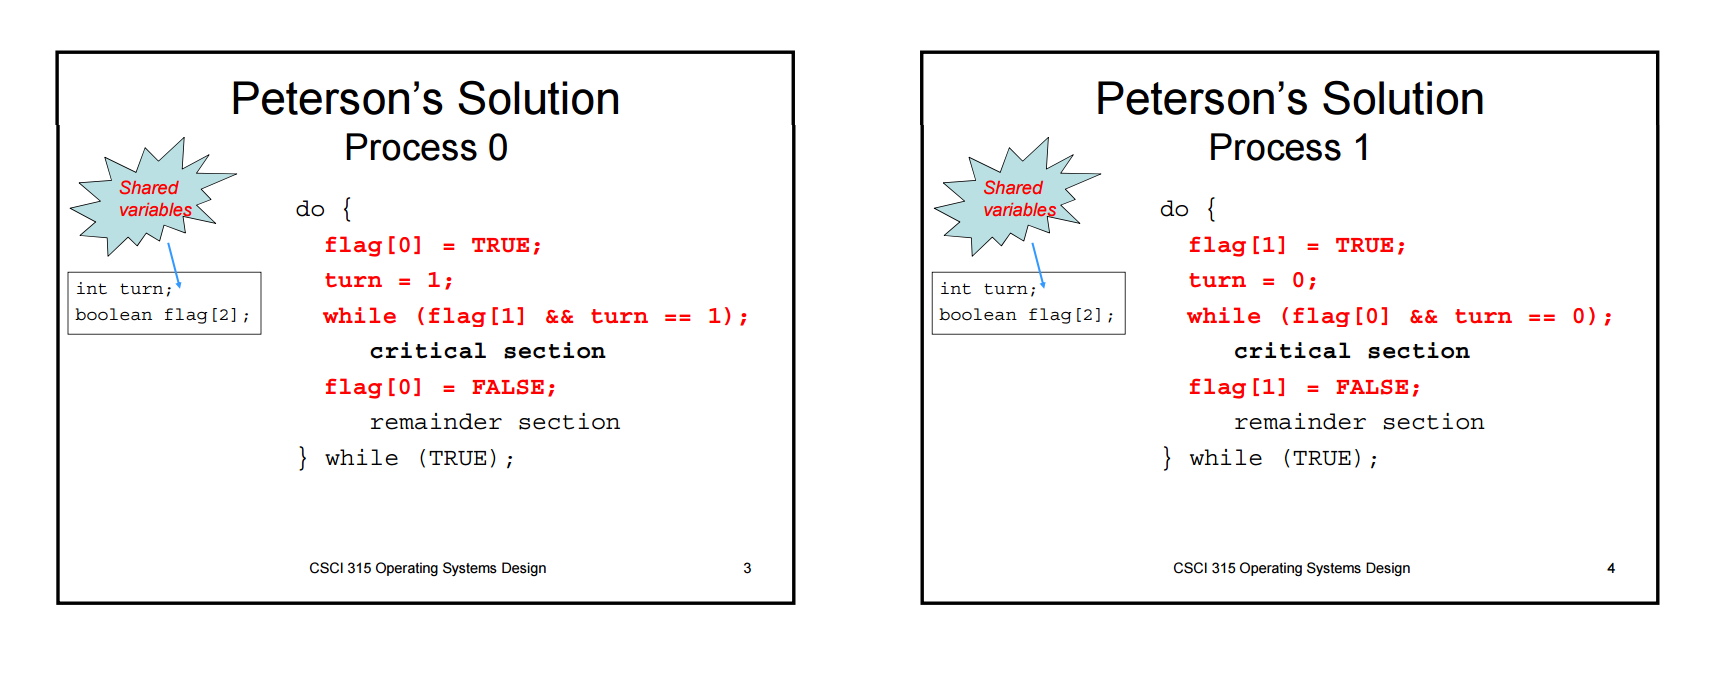

In [2]:
from IPython.display import Image
Image("assets/peterson1.png")

- Peterson’s solution is restricted to two processes that alternate execution
between their critical sections and remainder sections. The processes are
numbered P0 and P1. 


- For convenience, when presenting Pi, we use Pj to denote the other process; that is, j equals 1 − i.Peterson’s solution requires the two processes to share two data items:
    - **int turn ** Indicatess whose turn it is to enter into the critical section. 
    - **boolean flag[2]** Indicates when a process **wants** to enter into their critical section. 



- The variable turn indicates whose turn it is to enter its critical section. That is, if turn == i, then process Pi is allowed to execute in its critical section. The flag array is used to indicate if a process is ready to enter its critical section.


    - For example, if flag[i] is true, this value indicates that Pi is ready to enter its critical section. 
    
    - To enter the critical section, process Pi first sets flag[i] to true and then sets turn to the value j, thereby asserting that if the other process wishes to enter the critical section, it can do so. 
    
    - If both processes try to enter at the same time, turn will be set to both i and j at roughly the same time. Only one of these assignments will last; the other will occur but will be overwritten immediately.
    
    

- To prove that the solution is correct, we must examine the three conditions listed above:
      
   - **Mutual Exclusion**: If one process is executing their critical section when the other wishes to do so, the second process will become blocked by the flag of the first process. If both processes attempt to enter at the same time, the last process to execute *"turn = j"* will be blocked.
   
   - **Progress** - Each process can only be blocked at the while if the other process wants to use the critical section ( flag[ j ] = = true ), AND it is the other process's turn to use the critical section ( turn = = j ). If both of those conditions are true, then the other process ( j ) will be allowed to enter the critical section, and upon exiting the critical section, will set flag[ j ] to false, releasing process i. The shared variable turn assures that only one process at a time can be blocked, and the flag variable allows one process to release the other when exiting their critical section.
   
   - **Bounded Waiting** - As each process enters their entry section, they set the turn variable to be the other processes turn. Since no process ever sets it back to their own turn, this ensures that each process will have to let the other process go first at most one time before it becomes their turn again.
   
   
- Note that the instruction "turn = j" is atomic, that is it is a single machine instruction which cannot be interrupted.